# INTRODUCTION
- Every business has one silent fear: losing customers. No matter how good the product or how competitive the pricing, some customers just walk away—and understanding why is the key to keeping them.
That’s where this Customer Churn Dataset comes in. It’s more than rows and columns; it’s a story of behavior, frustration, loyalty, and decision-making. Each entry in this dataset represents a customer—some who stayed, and others who left.

* The dataset typically captures:
    - Demographic traits like age, gender, and location
    - Subscription details such as tenure, contract type, payment method
    - Service usage including internet, streaming, tech support
    - Customer interaction history—complaints, support calls, feedback
    - `(And most importantly: Churn status (yes/no))`


### Importing Libraries

In [168]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error

### Load Data

In [169]:
# Load the dataset
cell = pd.read_csv('cell2cellholdout.csv.zip')
cell.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [170]:
# See the data info
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [171]:
# View the Columns
print("Columns in the Dataset:", cell.columns)

Columns in the Dataset: Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeB

### Descritive Statistics

In [172]:
# Describe the dataset
cell.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,...,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,...,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,...,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,...,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,...,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,...,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,...,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000


In [173]:
cell.isnull().sum()

CustomerID                       0
Churn                        20000
MonthlyRevenue                  60
MonthlyMinutes                  60
TotalRecurringCharge            60
DirectorAssistedCalls           60
OverageMinutes                  60
RoamingCalls                    60
PercChangeMinutes              135
PercChangeRevenues             135
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      4
Handsets                         0
HandsetModels       

### Handling Missing Values

In [174]:
# Handling Missing Values
missing_percent = cell.isnull().mean() * 100
print(f'\n Missing Percent:', missing_percent)


 Missing Percent: CustomerID                     0.000
Churn                        100.000
MonthlyRevenue                 0.300
MonthlyMinutes                 0.300
TotalRecurringCharge           0.300
DirectorAssistedCalls          0.300
OverageMinutes                 0.300
RoamingCalls                   0.300
PercChangeMinutes              0.675
PercChangeRevenues             0.675
DroppedCalls                   0.000
BlockedCalls                   0.000
UnansweredCalls                0.000
CustomerCareCalls              0.000
ThreewayCalls                  0.000
ReceivedCalls                  0.000
OutboundCalls                  0.000
InboundCalls                   0.000
PeakCallsInOut                 0.000
OffPeakCallsInOut              0.000
DroppedBlockedCalls            0.000
CallForwardingCalls            0.000
CallWaitingCalls               0.000
MonthsInService                0.000
UniqueSubs                     0.000
ActiveSubs                     0.000
ServiceArea        

### Data Preprocessing

In [175]:
# Data Preprocessing
numairc_cols = cell.select_dtypes(include=["float", 'int64']).columns
cell[numairc_cols] = cell[numairc_cols].fillna(cell[numairc_cols].median())

categrical_cols = cell.select_dtypes(include=["object"]).columns
cell[categrical_cols] = cell[categrical_cols].fillna(cell[categrical_cols].mode())

cell.isnull().sum()

CustomerID                       0
Churn                        20000
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      4
Handsets                         0
HandsetModels       

### Rule for Churn Status
This rule creates a new column called Churn in the DataFrame cell, assigning a churn status of 'Yes' or 'No' based on monthly revenue:
- Customers with MonthlyRevenue > 45.0 are labeled as 'Yes', indicating potential churn risk.
- Customers with MonthlyRevenue ≤ 45.0 are labeled 'No', implying lower churn likelihood.


In [176]:
#Yes / No based on Churn Value
cell['Churn'] = np.where(cell['MonthlyRevenue'] > 45.0, 'Yes', 'No')

### Chossing Target Variable

In [177]:
# Use Churn as the target variable
X = cell.drop('Churn', axis=1)
y = cell['Churn']

### Geting a Dummies

In [178]:
# Get the dummies for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,False,False,False,True,False,False,False,False,False,False
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,False,False,False,False,True,False,False,False,False,False
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,False,True,False,False,False,False,False,False,False,True
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,False,False,False,True,False,False,False,False,False,False
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,False,False,False,True,False,False,False,False,False,False


### Spliting the Data

In [179]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Model Training using RandomForestClassifier

In [180]:
# Mdel Training
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

### Predict the Model

In [181]:
# Data Prediction
y_pred = model.predict(X_test)

### Exploratory Data Analysis

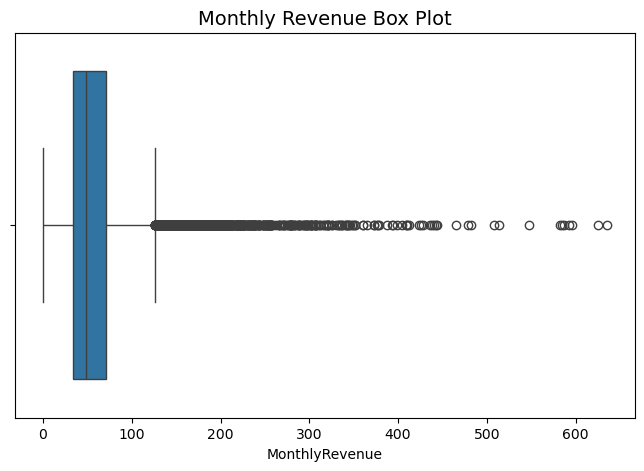

In [182]:
# Exploratory Data Analysis
# Monthly Revenue Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=cell['MonthlyRevenue'])
plt.title('Monthly Revenue Box Plot', fontsize=14)
plt.show()

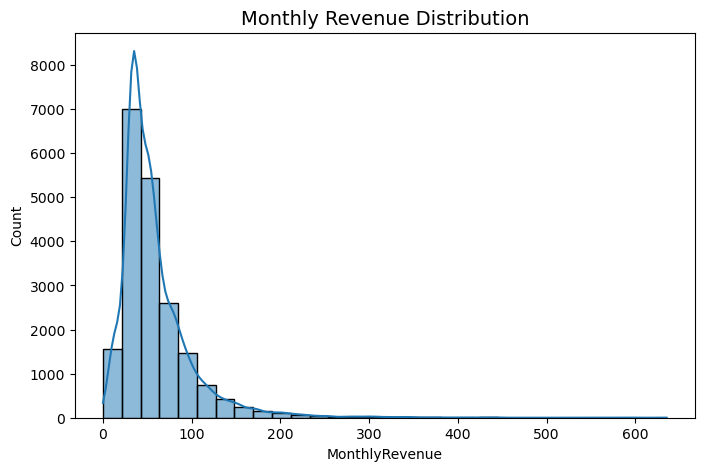

In [183]:
# Monthly Revenue Distribution Histogram
plt.figure(figsize=(8,5))
sns.histplot(cell['MonthlyRevenue'], bins=30, kde=True)
plt.title('Monthly Revenue Distribution', fontsize=14)
plt.show()

### Feature Importance

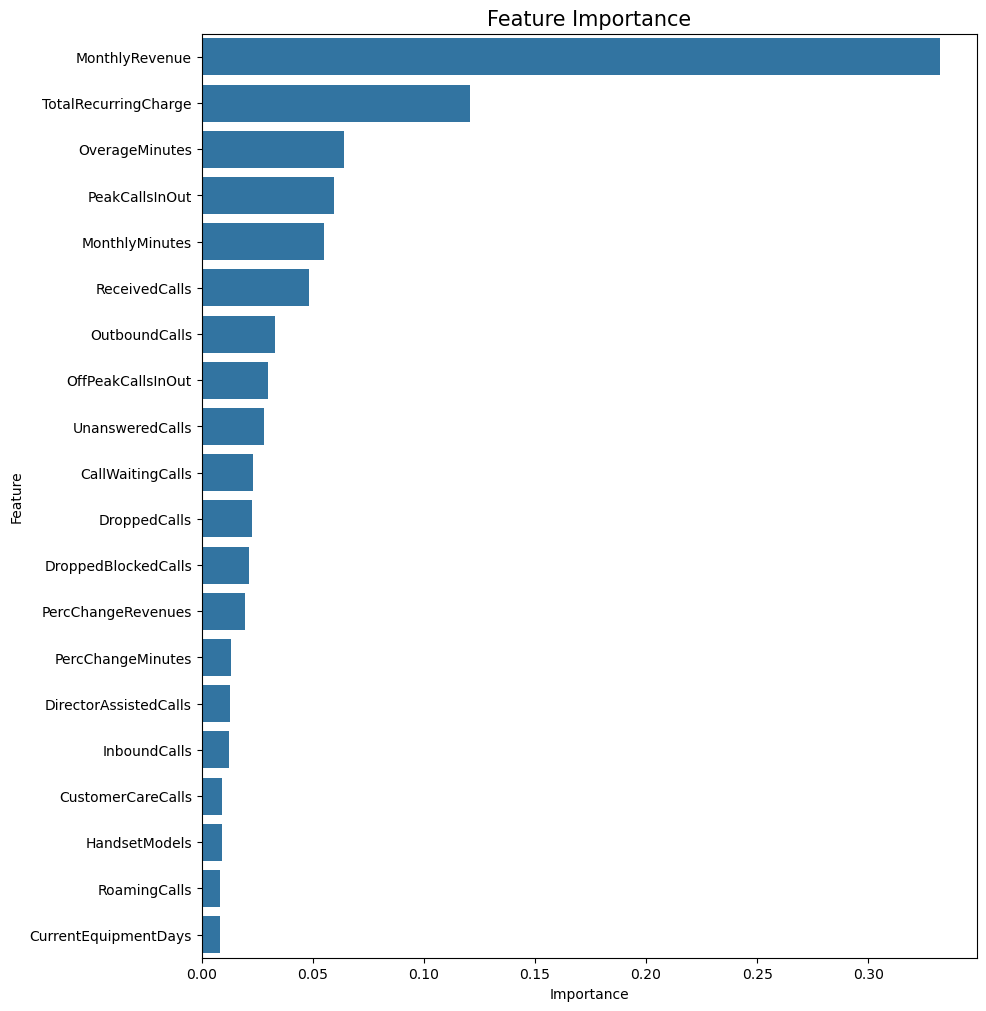

In [184]:
# Feature Importance
feature_importances = model.feature_importances_
feature = X_encoded.columns

feature_importances_df = pd.DataFrame({
    'feature': feature,
    'importance': feature_importances
    }
).sort_values(by='importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 12))
sns.barplot(x = 'importance', y = 'feature', data= feature_importances_df.head(20))
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Finding Accuracy And Classification Report And Confusion Matrix

In [185]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(f'\n Accuracy :', accuracy_score(y_test, y_pred))
print(f'\n Classification Report :', classification_report(y_test, y_pred))
print(f'\n Confusion Matrix :', confusion_matrix(y_test, y_pred))



 Accuracy : 0.98175

 Classification Report :               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1836
         Yes       0.97      0.99      0.98      2164

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000


 Confusion Matrix : [[1778   58]
 [  15 2149]]
